## Modality which  is better

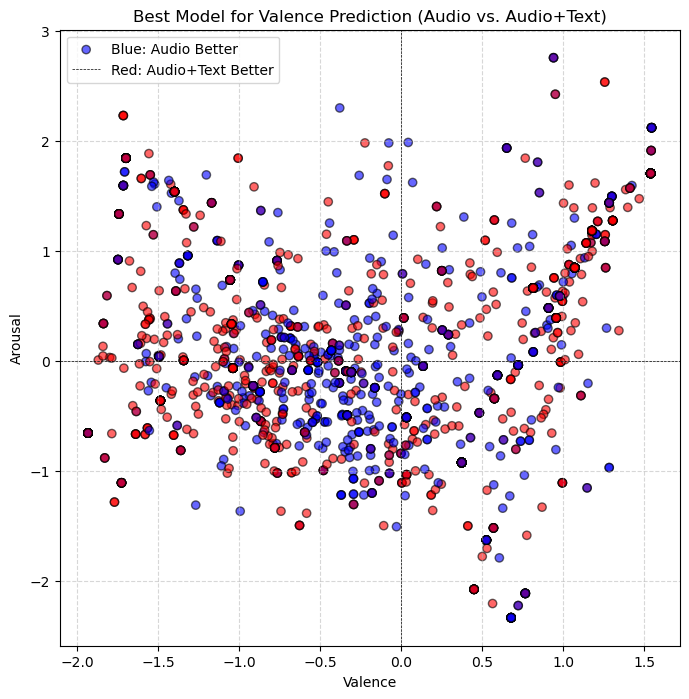

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ 读取 CSV 文件
audio_predictions = pd.read_csv("AUdio_predictions_mlp.csv")  # 仅音频预测
audio_text_predictions = pd.read_csv("predictions_mlp.csv")  # 音频+文本预测
ground_truth = pd.read_csv("data/merged/merged_cleaned_sentiment_validation.csv")  # 真实值

# 2️⃣ 提取需要的数据
y_valence = ground_truth["y_valence"]  # 真实 Valence
y_arousal = ground_truth["y_arousal"]  # 真实 Arousal

pred_valence_audio = audio_predictions["pred_valence"]  # 仅音频的 Valence 预测
pred_valence_audio_text = audio_text_predictions["pred_valence"]  # 音频+文本的 Valence 预测

# 3️⃣ 计算 RMSE (均方根误差) 进行比较
rmse_audio_valence = np.sqrt((pred_valence_audio - y_valence) ** 2)
rmse_audio_text_valence = np.sqrt((pred_valence_audio_text - y_valence) ** 2)

# 4️⃣ 确定哪种模态在 Valence 预测上表现更好
colors = np.where(rmse_audio_valence < rmse_audio_text_valence, 'blue', 'red')

# 5️⃣ 绘制 Valence-Arousal 平面
plt.figure(figsize=(8, 8))
plt.scatter(y_valence, y_arousal, c=colors, alpha=0.6, edgecolors="k")

# 6️⃣ 图形美化
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Best Model for Valence Prediction (Audio vs. Audio+Text)")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(["Blue: Audio Better", "Red: Audio+Text Better"])
plt.show()


## True vs predction

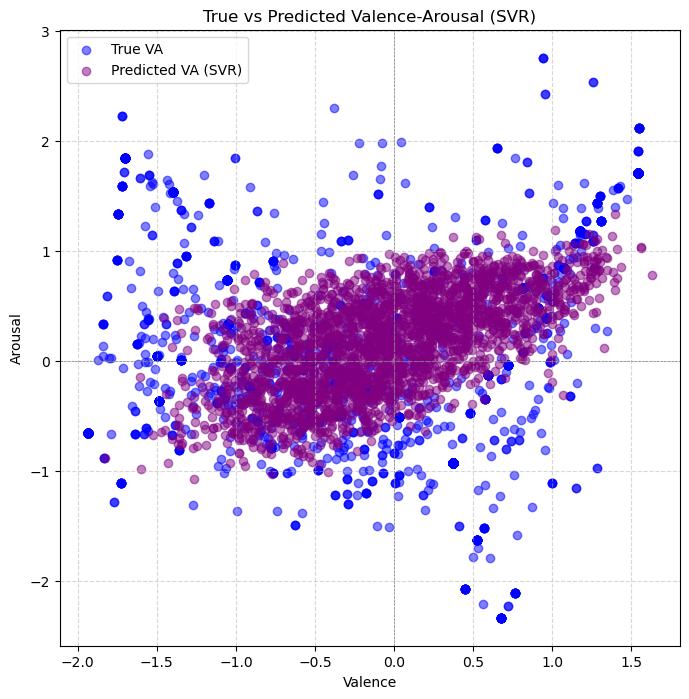

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 读取真实值
ground_truth = pd.read_csv("data/merged/merged_cleaned_sentiment_validation.csv")
y_valence = ground_truth["y_valence"]
y_arousal = ground_truth["y_arousal"]

# ✅ 读取 SVR 预测值
svr_predictions = pd.read_csv("predictions_svr_linear_gridC.csv")
pred_valence = svr_predictions["pred_valence"]
pred_arousal = svr_predictions["pred_arousal"]

# ✅ 绘图
plt.figure(figsize=(8, 8))
plt.scatter(y_valence, y_arousal, c='blue', alpha=0.5, label="True VA")
plt.scatter(pred_valence, pred_arousal, c='purple', alpha=0.5, label="Predicted VA (SVR)")

plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("True vs Predicted Valence-Arousal (SVR)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
